In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, levy_stable
import scipy
from statsmodels.distributions.empirical_distribution import ECDF 
import pandas as pd
sns.set_style("darkgrid")
pi = np.pi

# Raport 1

In [5]:
def MSE(y_true:np.array, y_pred:np.array) -> float:
    """
    Calculate mean squared error.
    """
    # Checking if there are NaNs in arrays, if detected, delete records in two arrays
    indexes = list(np.where(np.isnan(y_pred)==1))
    indexes.reverse()
    for i in indexes:
        y_true = np.drop(y_true, i)
    y_pred = y_pred[~np.isnan(y_pred)]

    if n:=len(y_true) != len(y_pred):
        raise ValueError('y_true and y_pred must have the same size.')
    return np.sum(np.power(y_true-y_pred, 2)) / n

def MAE(y_true:np.array, y_pred:np.array) -> float:
    # Checking if there are NaNs in arrays, if detected, delete records in two arrays
    indexes = list(np.where(np.isnan(y_pred)==1))
    indexes.reverse()
    for i in indexes:
        y_true = np.drop(y_true, i)
    y_pred = y_pred[~np.isnan(y_pred)]
    
    if n:=len(y_true) != len(y_pred):
        raise ValueError('y_true and y_pred must have the same size.')
    return np.sum(np.abs(y_true - y_pred, 2)) / n

In [6]:
def _stable_random_variables(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha
    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables(alpha, beta, gamma, delta):
    Z = _stable_random_variables(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta

In [8]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0

In [176]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
n = 2000000
Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
ecdf = ECDF(Xs)

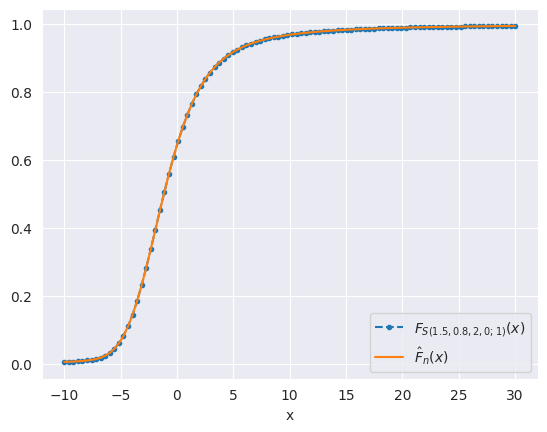

In [177]:
xs = np.linspace(-10,30,100)
Fx = ecdf(xs)
# plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = f"CDF S({alpha}, {beta}, {gamma}, {delta})")
plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = "$F_{S(%a, %a, %a, %a; 1)}(x)$"%(alpha, beta, gamma, delta))

plt.plot(xs, Fx, label = "$\\hat F_n(x)$")
plt.legend()
plt.xlabel("x")
# plt.savefig("stable_CDF.png")
plt.savefig("raport_1/latex/images/stable_CDF.png")
plt.show()

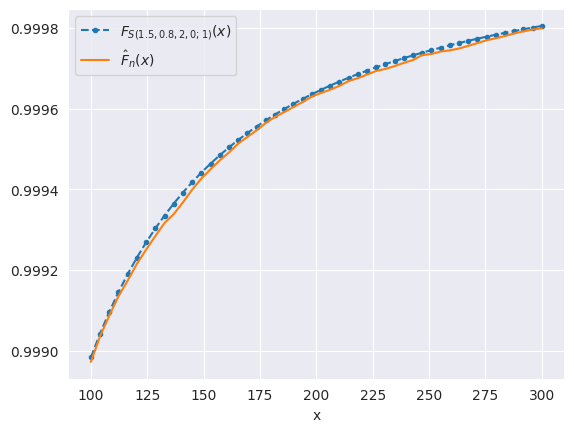

In [215]:
xs = np.linspace(100,300, 50)
Fx = ecdf(xs)
plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = "$F_{S(%a, %a, %a, %a; 1)}(x)$"%(alpha, beta, gamma, delta))

plt.plot(xs, Fx, label = "$\\hat F_n(x)$")
plt.xlabel("x")
plt.legend()
# plt.savefig("stable_CDF_large_x.png")
plt.savefig("raport_1/latex/images/stable_CDF_large_x.png")
plt.show()

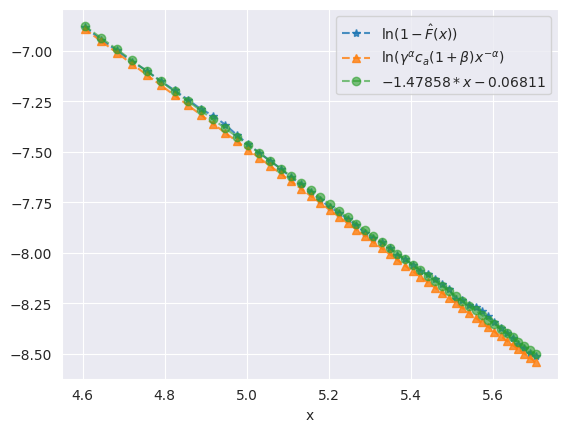

In [216]:
a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
c_a = np.sin(pi*alpha/2)*scipy.special.gamma(alpha)/pi
# ys = gamma**alpha*c_a*(1+beta)*(gamma*xs+delta+beta*gamma*np.tan(pi*alpha/2))**(-alpha)
ys = gamma**alpha*c_a*(1+beta)*(xs)**(-alpha)

plt.plot(np.log(xs), np.log(1-Fx), "*--", label = "$\\ln(1- \\hat{F}(x))$", alpha = 0.8)
plt.plot(np.log(xs), np.log(ys) ,"^--", label = "$\\ln(\\gamma^\\alpha c_a (1+\\beta)x^{-\\alpha})$", alpha = 0.8)
plt.plot(np.log(xs), a*np.log(xs) + b,"o--", label = f"${round(a, 5)}*x {round(b, 5)}$", alpha = 0.6)

plt.xlabel("x")
plt.legend()
plt.savefig("raport_1/latex/images/compare_cdf_plots_type_1.png")
plt.show()

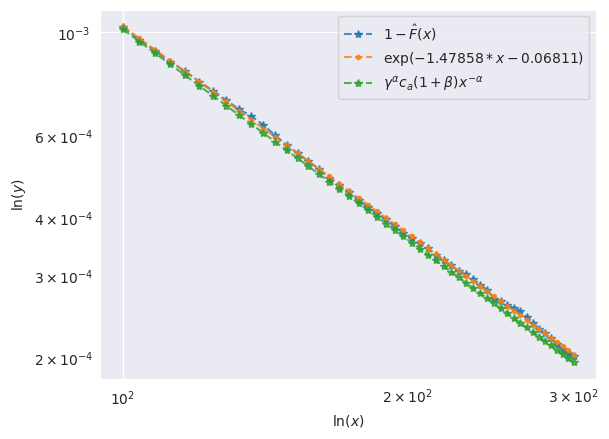

In [217]:
a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
c_a = np.sin(pi*alpha/2)*scipy.special.gamma(alpha)/pi
# ys = gamma**alpha*c_a*(1+beta)*(gamma*xs+delta+beta*gamma*np.tan(pi*alpha/2))**(-alpha)
ys = gamma**alpha*c_a*(1+beta)*(xs)**(-alpha)

plt.plot(xs, 1-Fx, "*--", label = "$1- \\hat{F}(x)$", alpha = 0.8)
plt.plot(xs, np.exp(a*np.log(xs) + b),".--", label = f"$\exp({round(a, 5)}*x{round(b, 5)})$", alpha = 0.8)
plt.plot(xs, ys ,"*--", label = "$\\gamma^\\alpha c_a (1+\\beta)x^{-\\alpha}$", alpha = 0.8)


plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("$\\ln(x)$")
plt.ylabel("$\\ln(y)$")

plt.savefig("raport_1/latex/images/compare_cdf_plots_type_2.png")
# plt.show()

# cdf montecarlo

In [197]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
xs = np.linspace(50, 100, 50)
xs = np.linspace(100,300, 50)
n = 2000


In [5]:
def sym_alpha_from_cdf(alpha, beta, gamma, delta, xs, n):
    Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
    ecdf = ECDF(Xs)
    Fx = ecdf(xs)
    a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
    return -a

In [199]:
ak = np.array([sym_alpha_from_cdf(alpha, beta, gamma, delta, xs, n) for _ in range(1000)])

/tmp/ipykernel_141944/813289726.py:5: RuntimeWarning: divide by zero encountered in log
  a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)


In [200]:
np.mean([i for i in ak if not np.isnan(i)] )

1.5991578076110078

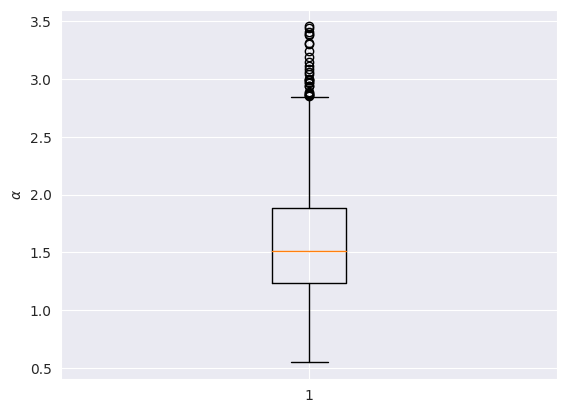

In [213]:

plt.boxplot([i for i in ak if not np.isnan(i)])
plt.ylabel("$\\alpha$")
# plt.savefig("raport_1/latex/images/cdf_alpha_boxplot.png")
plt.show()

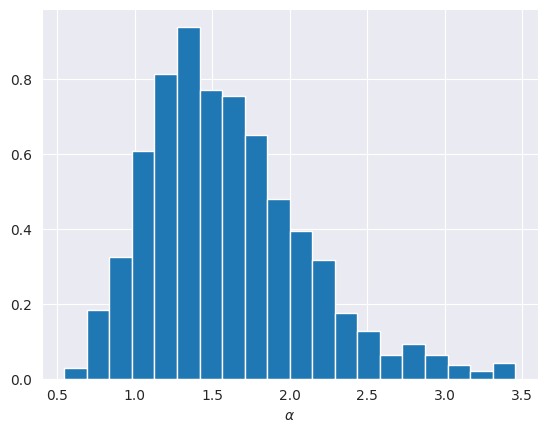

In [214]:

plt.hist(ak, bins = 20, density=True)
plt.xlabel("$\\alpha$")
plt.savefig("raport_1/latex/images/cdf_alpha_hist.png")
plt.show()

# hitmap

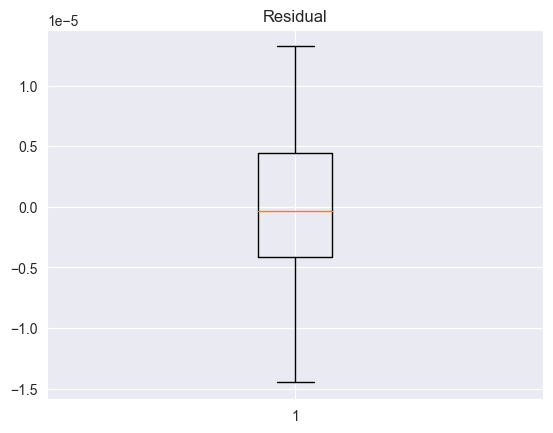

In [15]:
plt.title("Residual")
err =1-Fx - np.exp(a*np.log(xs) + b)
plt.boxplot( err )
plt.show()

In [16]:
yt = 1-Fx
R2 = 1 - np.sum(err**2)/np.sum((yt - np.mean(yt))**2)
R2

0.9988167854106025

In [69]:
import pandas as pd
pd.DataFrame(1-Fx - np.exp(a*np.log(xs) + b) ).describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,-1.292579e-08,0.000009,-0.00002,-0.000007,4.057712e-07,0.000006,0.000022


# Second method

## i

In [23]:
n = 10000
dt = 0.05
ts = np.arange(-1.5, 1.5, dt)
tn = len(ts)
Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
Z = np.mean(Xs, 1)

In [24]:
def cf(t, alpha, beta, gamma, delta):
    if alpha == 1:
        return np.exp(-gamma*np.abs(t)*(1+1j*beta*2/pi*np.log(np.abs(t))*np.sign(t))+1j*delta*t)
    else:
        return np.exp(-gamma**alpha*np.abs(t)**alpha*(1-1j*beta*(np.tan(pi*alpha/2)*np.sign(t)))+1j*delta*t)


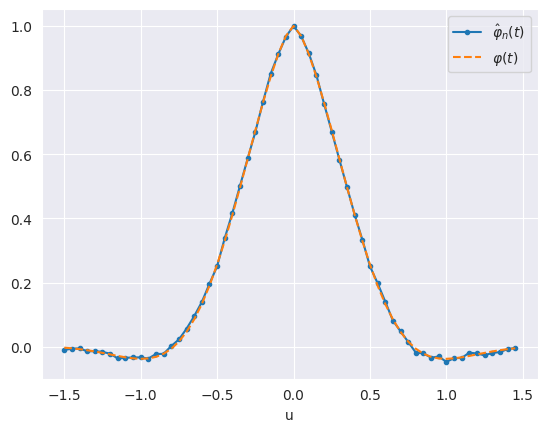

In [25]:
plt.plot(ts, Z, ".-", label = "$\\hat \\varphi_n (t)$")
plt.plot(ts, cf(ts, alpha, beta, gamma, delta), "--", label = "$\\varphi (t)$")

plt.xlabel("u")
plt.legend()

plt.savefig("raport_1/latex/images/stable_CF.png")
plt.show()

In [20]:
n = 10000
dt = 0.05
ts = np.arange(dt, 1.5, dt)
ts = np.arange(0.2, 1, 0.05)

tn = len(ts)
Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
Z = np.mean(Xs, 1)

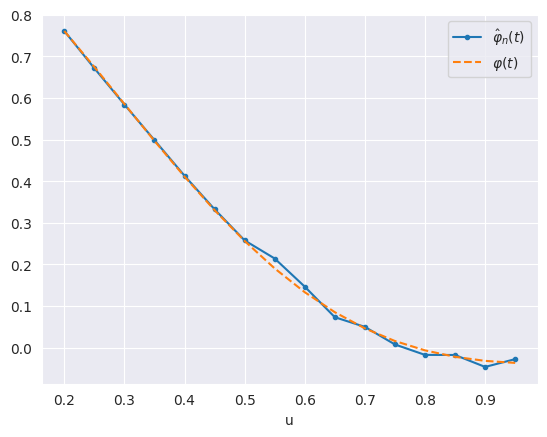

In [21]:
plt.plot(ts, Z, ".-", label = "$\\hat \\varphi_n (t)$")
plt.plot(ts, cf(ts, alpha, beta, gamma, delta), "--", label = "$\\varphi (t)$")

plt.xlabel("u")
plt.legend()

# plt.savefig("raport_1/latex/images/stable_CDF_half.png")
plt.show()

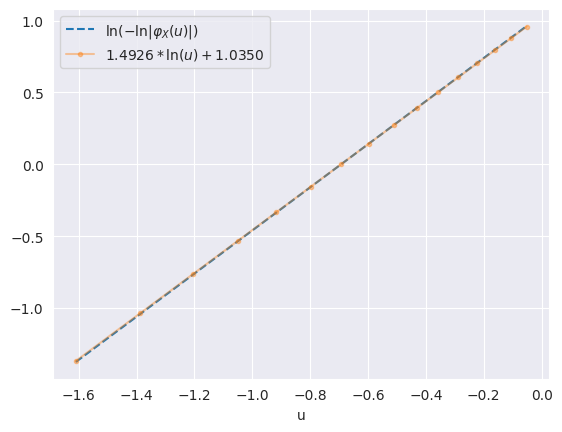

In [22]:
a, b  =np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z))), 1)
plt.plot(np.log(ts), np.log(-np.log(np.abs(cf(ts, alpha, beta, gamma, delta)))), "--", label  = "$\ln(-\\ln |\\varphi_X(u)|)$")
plt.plot(np.log(ts), np.log(-np.log(np.abs(Z))), "*-", label = "$\ln(-\\ln |\\hat \\varphi_{X_n}(u)|)$")
plt.plot(np.log(ts), a*np.log(ts) + b,".-", label = "$%.4f*\\ln(u)+%.4f$"%(a,b), alpha = 0.4)
plt.xlabel("u")
plt.legend()
# plt.savefig("raport_1/latex/images/compare_cf.png")
plt.show()

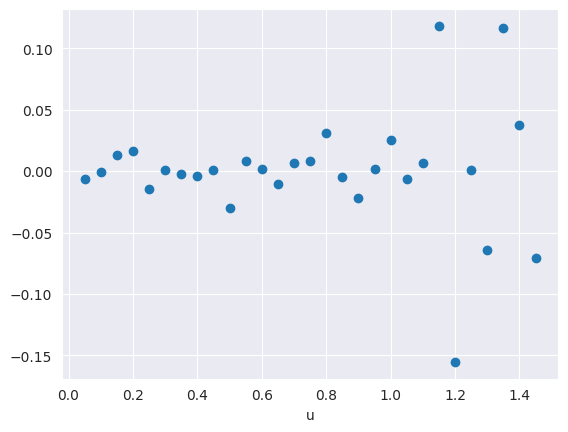

In [146]:
yt = np.log(-np.log(np.abs(Z)))
yt_model = a*np.log(ts) + b 
err = yt - yt_model
plt.scatter(ts, err)
plt.xlabel("u")
plt.savefig("raport_1/latex/images/cf_residuals.png")
plt.show()

## ii

In [154]:
n = 5000
dt = 0.05
ts = np.arange(0.2, 1, dt)
tn = len(ts)

In [155]:
def sym_alpha_from_cf(alpha, beta, gamma, delta, ts, n):
    tn = len(ts)
    Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
    Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
    Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
    Z = np.mean(Xs, 1)
    a, b  =np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z))), 1)
    return a

In [163]:

ak_cf = np.array([sym_alpha_from_cf(alpha, beta, gamma, delta, ts, n) for _ in range(1000)])
ak_cf = ak_cf[~np.isnan(ak_cf)]
np.mean([i for i in ak_cf if not np.isnan(i)] )

1.500192568866764

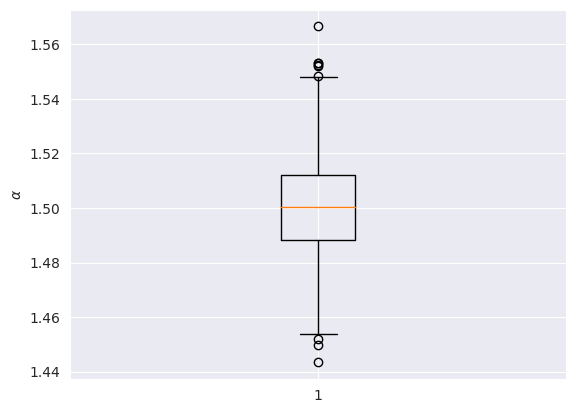

In [164]:
plt.boxplot(ak_cf[~np.isnan(ak_cf)])
plt.ylabel("$\\alpha$")
plt.savefig("raport_1/latex/images/cf_alpha_boxplot.png")
plt.show()

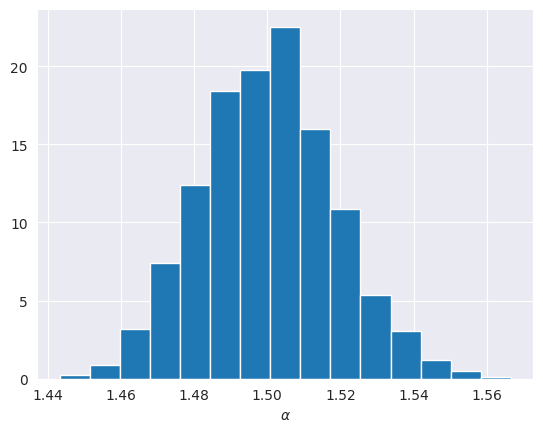

In [168]:
plt.hist(ak_cf, bins = 15, density=True)
plt.xlabel("$\\alpha$")
plt.savefig("raport_1/latex/images/cf_alpha_hist.png")
plt.show()

In [1]:
# import pandas as pd
print(pd.DataFrame(ak_cf).describe().T.to_latex())

NameError: name 'pd' is not defined

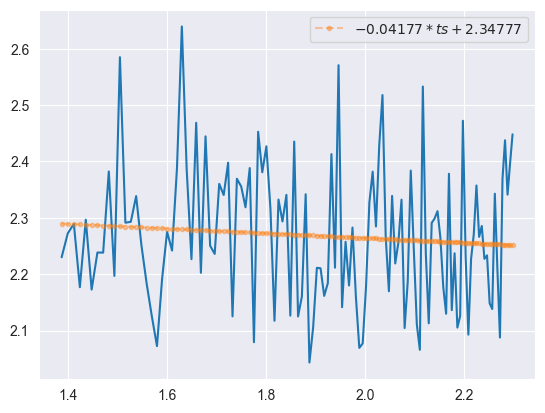

In [34]:
plt.plot(np.log(ts), np.log(-np.log(np.abs(Z)**2)), "-")
a2, b2 =np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z)**2)), 1)
plt.plot(np.log(ts), a2*np.log(ts) + b2,".--", label = f"${round(a2, 5)}*ts+{round(b2, 5)}$", alpha = 0.4)
plt.legend()
plt.show()

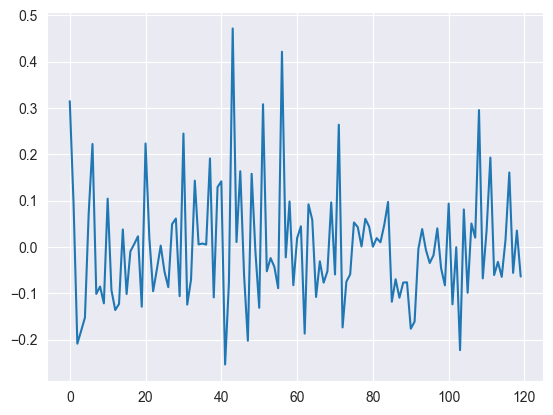

In [23]:
yt = np.log(-np.log(np.abs(Z)**2))
yt_model = a2 * np.log(ts) + b2 
err = yt - yt_model
plt.plot(err)

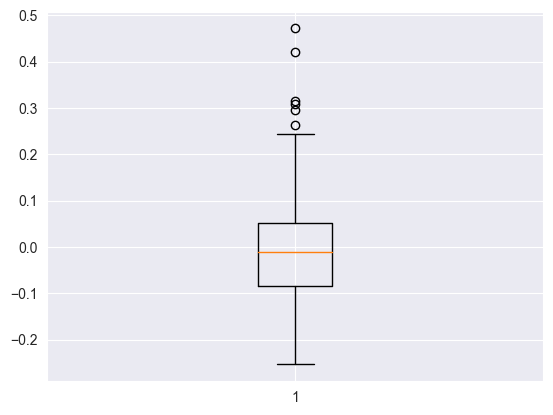

In [27]:
plt.boxplot(err)
plt.show()

In [25]:
R2 = 1 - np.sum(err**2)/np.sum((yt - np.mean(yt))**2)
R2

0.001326712986388312